In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
sns.set()
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier  # Use this for classification tasks
from lightgbm import LGBMRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
linkedin_df = pd.read_csv('LinkedInJobs_MLDataset.csv')

In [3]:
# Head of the dataset
linkedin_df.head()

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1


In [4]:
# Define the new column names
new_column_names = {
    'Co_Nm': 'Company_Name',
    'Co_Pg_Lstd': 'Company_Page_Listed',
    'Emp_Cnt': 'Employee_Count',
    'Flw_Cnt': 'Follower_Count',
    'Job_Ttl': 'Job_Title',
    'Job_Desc': 'Job_Description',
    'Is_Supvsr': 'Is_Supervisor',
    'max_sal': 'Salary',
    'med_sal': 'Median_Salary',
    'min_sal': 'Min_Salary',
    'py_prd': 'Posting_Period',
    'py_lstd': 'Posting_Listed',
    'wrk_typ': 'Work_Type',
    'loc': 'Location',
    'st_code': 'State_Code',
    'is_remote': 'Is_Remote',
    'views': 'Views',
    'app_typ': 'Application_Type',
    'app_is_off': 'Application_Is_Offsite',
    'xp_lvl': 'Experience_Level',
    'domain': 'Domain',
    'has_post_domain': 'Has_Posting_Domain',
    'is_sponsored': 'Is_Sponsored',
    'base_comp': 'Base_Compensation'
}

# Rename columns from above
linkedin_df.rename(columns=new_column_names, inplace=True)

# Check the updated column names
print(linkedin_df.columns)

Index(['Company_Name', 'Company_Page_Listed', 'Employee_Count',
       'Follower_Count', 'Job_Title', 'Job_Description', 'Is_Supervisor',
       'Salary', 'Median_Salary', 'Min_Salary', 'Posting_Period',
       'Posting_Listed', 'Work_Type', 'Location', 'State_Code', 'Is_Remote',
       'Views', 'Application_Type', 'Application_Is_Offsite',
       'Experience_Level', 'Domain', 'Has_Posting_Domain', 'Is_Sponsored',
       'Base_Compensation'],
      dtype='object')


In [5]:
# Drop 'Min_Salary' and 'Median_Salary' columns
linkedin_df = linkedin_df.drop(columns=['Min_Salary', 'Median_Salary'])


In [6]:
# Describe the dataset
linkedin_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Employee_Count,33246.0,15484.558744,6.218095e+04,0.0,148.00,1235.0,8160.0000,829111.0
Follower_Count,33246.0,523436.391055,2.708736e+06,0.0,8135.75,37996.5,168036.0000,31887198.0
Salary,33246.0,31866.146792,6.823853e+04,0.0,0.00,0.0,97.9675,1300000.0
Is_Remote,33246.0,0.144438,3.515390e-01,0.0,0.00,0.0,0.0000,1.0
Views,33246.0,45.424592,1.269727e+02,0.0,1.00,7.0,38.0000,5656.0
Is_Sponsored,33246.0,0.244150,4.295884e-01,0.0,0.00,0.0,0.0000,1.0
Base_Compensation,33246.0,0.401612,4.902317e-01,0.0,0.00,0.0,1.0000,1.0


In [7]:
# Info of the dataset
linkedin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company_Name            33242 non-null  object 
 1   Company_Page_Listed     33246 non-null  bool   
 2   Employee_Count          33246 non-null  int64  
 3   Follower_Count          33246 non-null  int64  
 4   Job_Title               33246 non-null  object 
 5   Job_Description         33244 non-null  object 
 6   Is_Supervisor           33246 non-null  bool   
 7   Salary                  33246 non-null  float64
 8   Posting_Period          33246 non-null  object 
 9   Posting_Listed          33246 non-null  bool   
 10  Work_Type               33246 non-null  object 
 11  Location                33246 non-null  object 
 12  State_Code              33246 non-null  object 
 13  Is_Remote               33246 non-null  int64  
 14  Views                   33246 non-null

In [8]:
# Shape of the dataset
linkedin_df.shape

(33246, 22)

In [9]:
# Check the sum of missing values
linkedin_df.isna().sum()

Company_Name                  4
Company_Page_Listed           0
Employee_Count                0
Follower_Count                0
Job_Title                     0
Job_Description               2
Is_Supervisor                 0
Salary                        0
Posting_Period                0
Posting_Listed                0
Work_Type                     0
Location                      0
State_Code                    0
Is_Remote                     0
Views                         0
Application_Type              0
Application_Is_Offsite        0
Experience_Level              0
Domain                    13558
Has_Posting_Domain            0
Is_Sponsored                  0
Base_Compensation             0
dtype: int64

In [10]:
# Drop the na values from company name and job description
linkedin_df = linkedin_df.dropna(subset=['Company_Name'])
linkedin_df = linkedin_df.dropna(subset=['Job_Description'])

In [11]:
# Check for duplicate rows based on all columns
duplicate_rows = linkedin_df[linkedin_df.duplicated()]

# Display duplicate rows
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)

Duplicate Rows except first occurrence:
                               Company_Name  Company_Page_Listed  \
3291                         Aya Healthcare                 True   
3292                         Aya Healthcare                 True   
3316                         Aya Healthcare                 True   
3326                         Aya Healthcare                 True   
3329                       ComTec Solutions                 True   
...                                     ...                  ...   
32431  Price Chopper Supermarkets-Market 32                 True   
32680                             UF Health                 True   
32681                             UF Health                 True   
32693                              Claire's                 True   
32695                              Claire's                 True   

       Employee_Count  Follower_Count  \
3291            18302           90008   
3292            18302           90008   
3316            1830

In [12]:
# Remove duplicate rows and keep the first occurrence
linkedin_df = linkedin_df.drop_duplicates()


In [13]:
# List of numerical columns to check for outliers
numerical_columns = ['Employee_Count', 'Follower_Count', 'Views']

for col in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = linkedin_df[col].quantile(0.25)
    Q3 = linkedin_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define limits for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = linkedin_df[(linkedin_df[col] < lower_bound) | (linkedin_df[col] > upper_bound)]
    
    # Option 1: Remove outliers
    #linkedin_df = linkedin_df[~((linkedin_df[col] < lower_bound) | (linkedin_df[col] > upper_bound))]
    
    # Option 2: Replace outliers with median (more robust to outliers than the mean)
    linkedin_df.loc[linkedin_df[col] < lower_bound, col] = linkedin_df[col].median()
    linkedin_df.loc[linkedin_df[col] > upper_bound, col] = linkedin_df[col].median()
    
    # Print information about outliers
    print(f"Column: {col}, Outliers: {len(outliers)}")

Column: Employee_Count, Outliers: 4505
Column: Follower_Count, Outliers: 4838
Column: Views, Outliers: 4061


In [14]:
#Checking the number of unique values
linkedin_df.select_dtypes(include='int64').nunique()

Employee_Count       3391
Follower_Count       8620
Is_Remote               2
Views                  94
Is_Sponsored            2
Base_Compensation       2
dtype: int64

In [15]:
#Checking the number of unique values
linkedin_df.select_dtypes(include='bool').nunique()

Company_Page_Listed       2
Is_Supervisor             2
Posting_Listed            2
Application_Is_Offsite    2
Has_Posting_Domain        2
dtype: int64

In [16]:
#Checking the number of unique values
linkedin_df.select_dtypes(include='object').nunique()

Company_Name        11267
Job_Title           22286
Job_Description     30136
Posting_Period          7
Work_Type               7
Location             4620
State_Code             53
Application_Type        3
Experience_Level        7
Domain               2576
dtype: int64

In [17]:
#Checking the number of unique values
linkedin_df.select_dtypes(include='float64').nunique()

Salary    2709
dtype: int64

In [18]:
# Count of sponsored vs. non-sponsored posts
print("Count of sponsored vs. non-sponsored posts:")
print(linkedin_df['Is_Sponsored'].value_counts())
print("\n")

Count of sponsored vs. non-sponsored posts:
Is_Sponsored
0    25022
1     8100
Name: count, dtype: int64




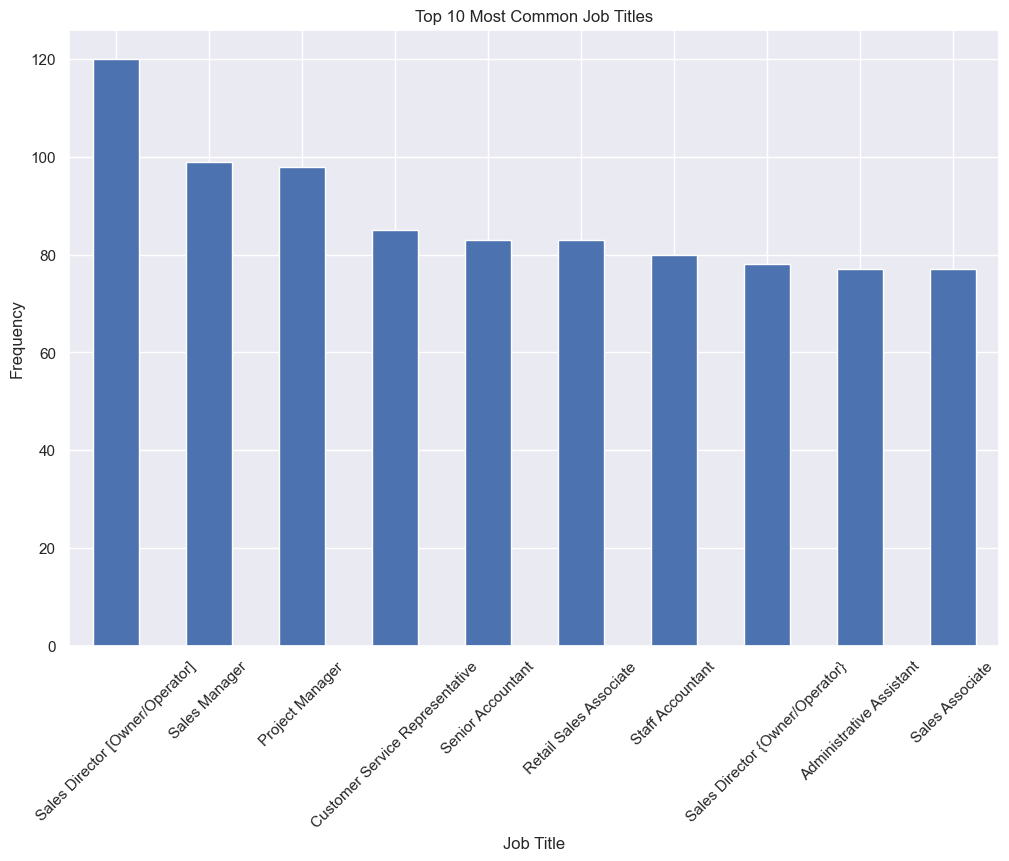

In [19]:
# Job Title Frequency
plt.figure(figsize=(12, 8))
linkedin_df['Job_Title'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

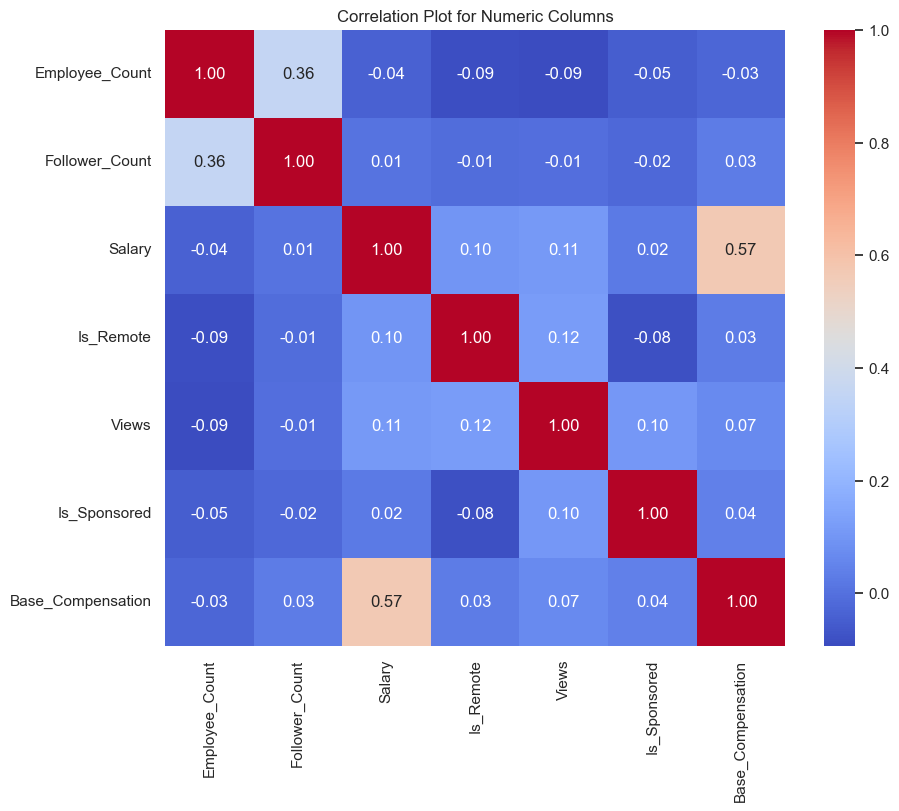

In [20]:
# Assuming your dataframe is named 'df'
numeric_columns = linkedin_df.select_dtypes(include=['int64', 'float64']).columns

# Filter numeric columns
numeric_data = linkedin_df[numeric_columns]

# Correlation Plot
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot for Numeric Columns')
plt.show()

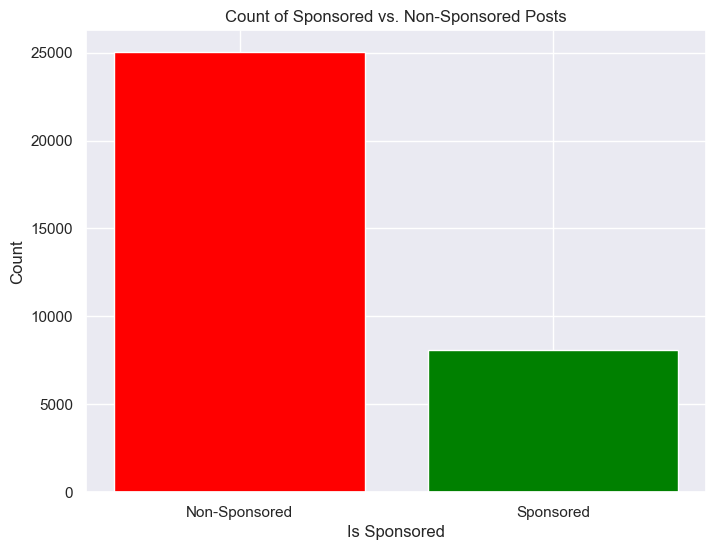

In [21]:
# Count of sponsored vs. non-sponsored posts
sponsored_counts = linkedin_df['Is_Sponsored'].value_counts()

# Create histogram
plt.figure(figsize=(8, 6))
plt.bar(sponsored_counts.index, sponsored_counts.values, color=['red', 'green'])
plt.title('Count of Sponsored vs. Non-Sponsored Posts')
plt.xlabel('Is Sponsored')
plt.ylabel('Count')
plt.xticks(sponsored_counts.index, ['Non-Sponsored', 'Sponsored'])
plt.show()

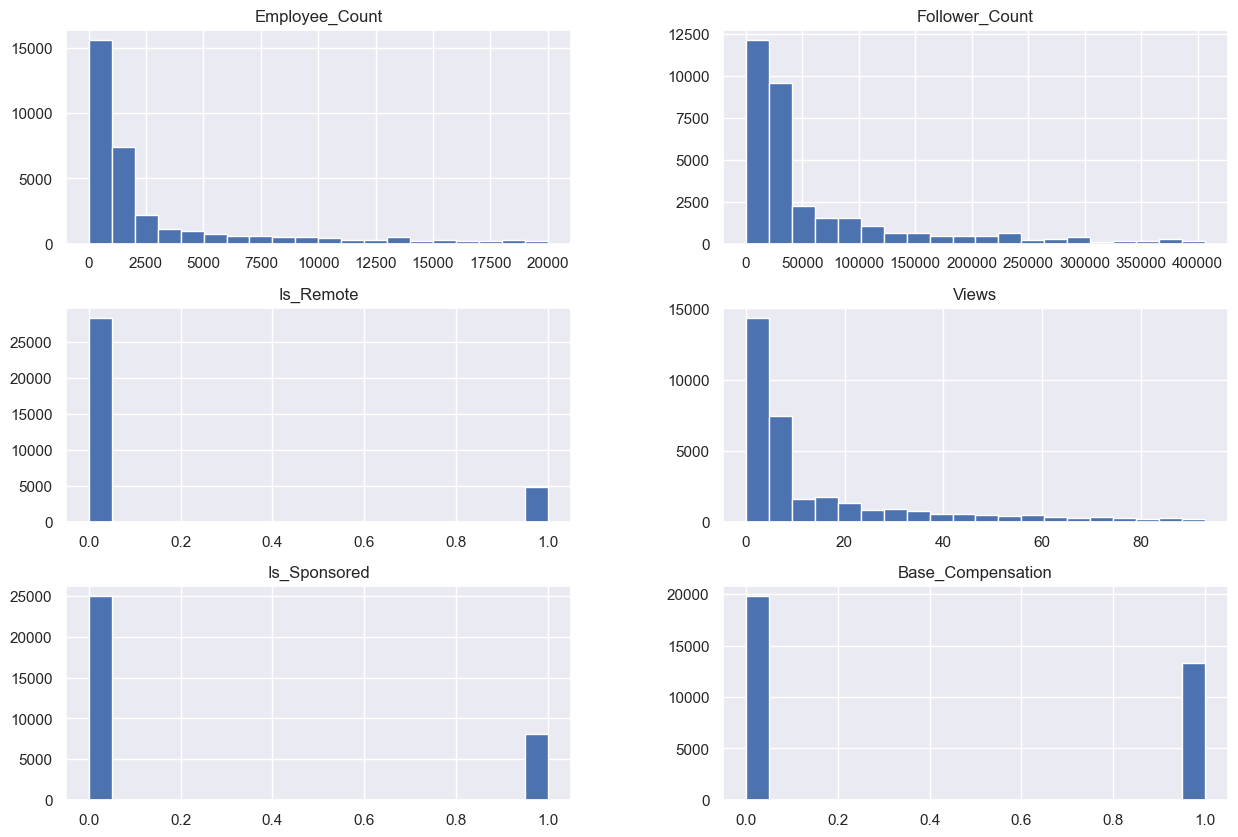

In [22]:
# Create histograms for each numeric variable
numeric_columns = linkedin_df.select_dtypes(include=['int64'])
numeric_columns.hist(bins=20, figsize=(15, 10))
plt.show()

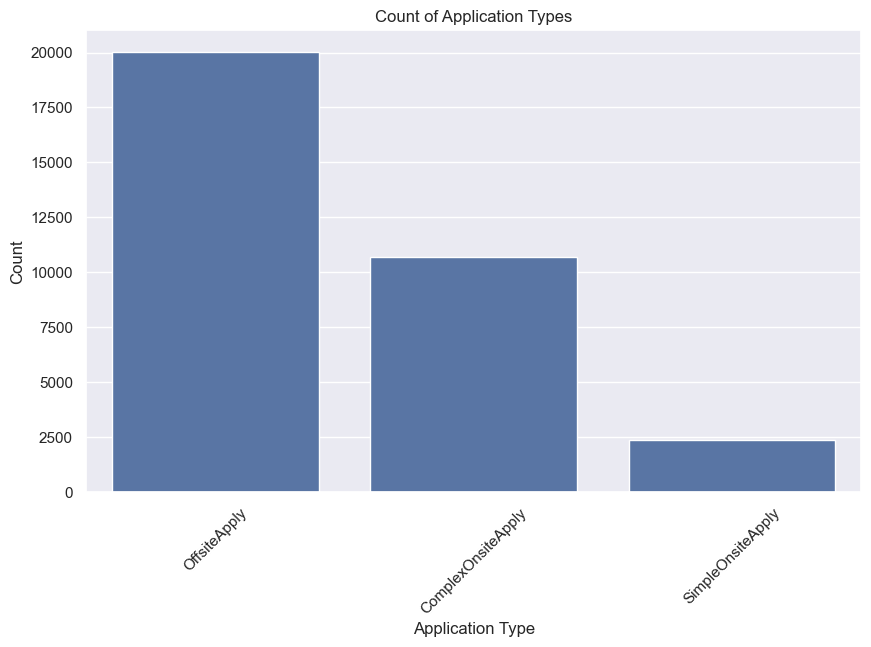

In [23]:
# Count plot of application types
plt.figure(figsize=(10, 6))
sns.countplot(x='Application_Type', data=linkedin_df)
plt.title('Count of Application Types')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame if needed
# linkedin_df = pd.read_csv('LinkedInJobs_MLDataset.csv')

# Display current columns for verification
print("Current columns in DataFrame:", linkedin_df.columns)

# Define categorical columns based on current DataFrame structure
categorical_cols = [
    'Company_Name', 'Job_Title', 'Job_Description', 'Location', 
    'State_Code', 'Application_Type', 'Domain'
]

# Check and add columns dynamically if they exist
dynamic_cols = [
    'Posting_Period', 'Work_Type', 'Experience_Level'
]

# Extend categorical_cols with existing dynamic columns
for col in dynamic_cols:
    if any(linkedin_df.columns.str.contains(col)):  # Check if any column contains the dynamic column pattern
        categorical_cols.extend([x for x in linkedin_df.columns if col in x])

# Encode categorical variables
encoder = LabelEncoder()
for col in categorical_cols:
    if col in linkedin_df.columns:  # Ensure the column exists before attempting to encode
        linkedin_df[col] = encoder.fit_transform(linkedin_df[col])

# Fill missing values and continue preprocessing
linkedin_df.fillna(0, inplace=True)  # Adjust according to your context

# Calculate and print correlation matrix
correlation_matrix = linkedin_df.corr()
correlation_with_target = correlation_matrix['Is_Sponsored'].sort_values(ascending=False)
print(correlation_with_target)


Current columns in DataFrame: Index(['Company_Name', 'Company_Page_Listed', 'Employee_Count',
       'Follower_Count', 'Job_Title', 'Job_Description', 'Is_Supervisor',
       'Salary', 'Posting_Period', 'Posting_Listed', 'Work_Type', 'Location',
       'State_Code', 'Is_Remote', 'Views', 'Application_Type',
       'Application_Is_Offsite', 'Experience_Level', 'Domain',
       'Has_Posting_Domain', 'Is_Sponsored', 'Base_Compensation'],
      dtype='object')
Is_Sponsored              1.000000
Views                     0.103618
Domain                    0.077696
Is_Supervisor             0.044454
Posting_Period            0.042017
Base_Compensation         0.039511
Posting_Listed            0.035180
Salary                    0.023090
Job_Description           0.021222
Company_Page_Listed       0.002650
Company_Name             -0.013835
Job_Title                -0.016272
Work_Type                -0.020672
Follower_Count           -0.023433
Location                 -0.031428
State_Code    

In [25]:
# List of columns to potentially drop
columns_to_drop = [
    'Application_Type',
    'Location',
    'State_Code',
    'Job_Title',
    'Job_Description',
    'Company_Name',
    'Work_Type_Temporary',                 
    'Posting_Period_MONTHLY',              
    'Posting_Period_ONCE',                 
    'Work_Type_Other',                     
    'Posting_Period_WEEKLY',               
    'Experience_Level_Executive',          
    'Work_Type_Volunteer',                 
    'Experience_Level_Entry level',        
    'Follower_Count',                  
    'Posting_Period_Unpaid',               
    'Work_Type_Internship',                
    'Follower_Count_log',                  
    'Experience_Level_Internship',         
    'Work_Type_Part-time',                 
    'Posting_Period_Not Listed',           
    'Employee_Count',                      
    'Experience_Level_Mid-Senior level',   
    'Is_Remote',                           
    'Application_Is_Offsite',              
    'Has_Posting_Domain'                  
]

# Filter out the columns that actually exist in the DataFrame to avoid KeyError
existing_columns_to_drop = [col for col in columns_to_drop if col in linkedin_df.columns]

# Create the new DataFrame df_train by dropping specified columns
df_train = linkedin_df.drop(columns=existing_columns_to_drop)

# Display the updated DataFrame info
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33122 entries, 0 to 33245
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company_Page_Listed  33122 non-null  bool   
 1   Is_Supervisor        33122 non-null  bool   
 2   Salary               33122 non-null  float64
 3   Posting_Period       33122 non-null  int32  
 4   Posting_Listed       33122 non-null  bool   
 5   Work_Type            33122 non-null  int32  
 6   Views                33122 non-null  int64  
 7   Experience_Level     33122 non-null  int32  
 8   Domain               33122 non-null  int32  
 9   Is_Sponsored         33122 non-null  int64  
 10  Base_Compensation    33122 non-null  int64  
dtypes: bool(3), float64(1), int32(4), int64(3)
memory usage: 1.9 MB


In [26]:
# Split the data into training and testing sets
X = df_train.drop('Is_Sponsored', axis=1)
y = df_train['Is_Sponsored']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (26497, 10)
X_test shape: (6625, 10)
y_train shape: (26497,)
y_test shape: (6625,)


In [27]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume df is your DataFrame

# Columns to standardize
columns_to_scale = ['Salary']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data for the selected columns
linkedin_df[columns_to_scale] = scaler.fit_transform(linkedin_df[columns_to_scale])

# Display the scaled DataFrame to check the result
print(linkedin_df.head())

   Company_Name  Company_Page_Listed  Employee_Count  Follower_Count  \
0          4438                 True            1171           11417   
1          6249                 True             300            2923   
2         10169                 True             314            8487   
3          3312                 True              36             305   
4         11188                 True            1227           51933   

   Job_Title  Job_Description  Is_Supervisor    Salary  Posting_Period  \
0       8435            18641          False -0.390335               1   
1      18589            16763          False -0.467209               2   
2      10909            25793           True -0.467209               2   
3       4280            29902          False -0.466882               0   
4      13716            13984          False  3.571736               6   

   Posting_Listed  ...  State_Code  Is_Remote  Views  Application_Type  \
0            True  ...          41          0   

In [28]:
### Decision Tree 
# Best Parameters for Decision Tree Classifier
best_params = {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

# Create and train the Decision Tree Classifier with the specified parameters
dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=0)

dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Model Accuracy: 0.6873962264150943
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80      4949
           1       0.35      0.28      0.31      1676

    accuracy                           0.69      6625
   macro avg       0.56      0.55      0.56      6625
weighted avg       0.67      0.69      0.68      6625



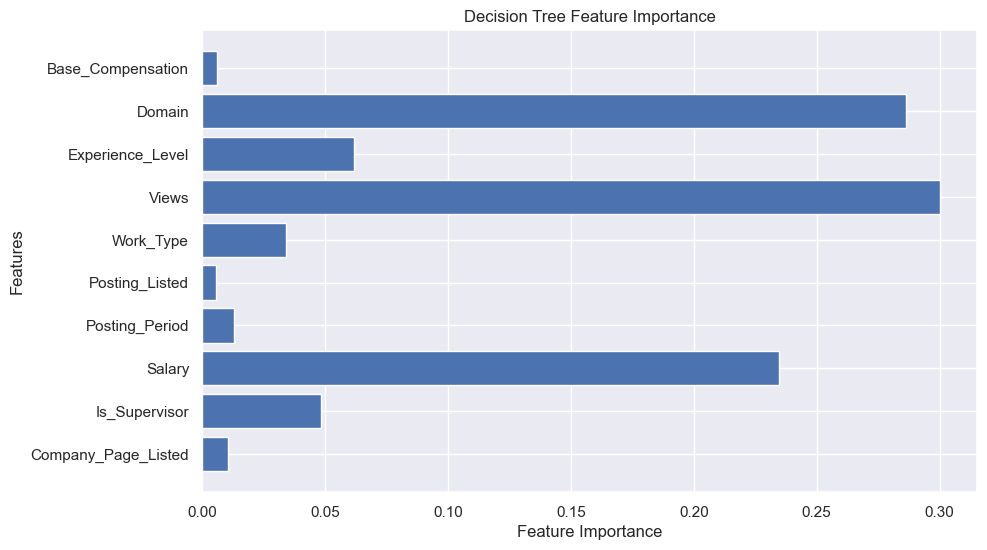

In [29]:
# Assuming 'X_train' contains your training features and 'y_train' contains your target labels
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Plotting feature importances
plt.figure(figsize=(10,6))
plt.barh(X_train.columns, dt.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

In [30]:

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.7523018867924528
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      4949
           1       0.62      0.05      0.10      1676

    accuracy                           0.75      6625
   macro avg       0.69      0.52      0.48      6625
weighted avg       0.72      0.75      0.66      6625



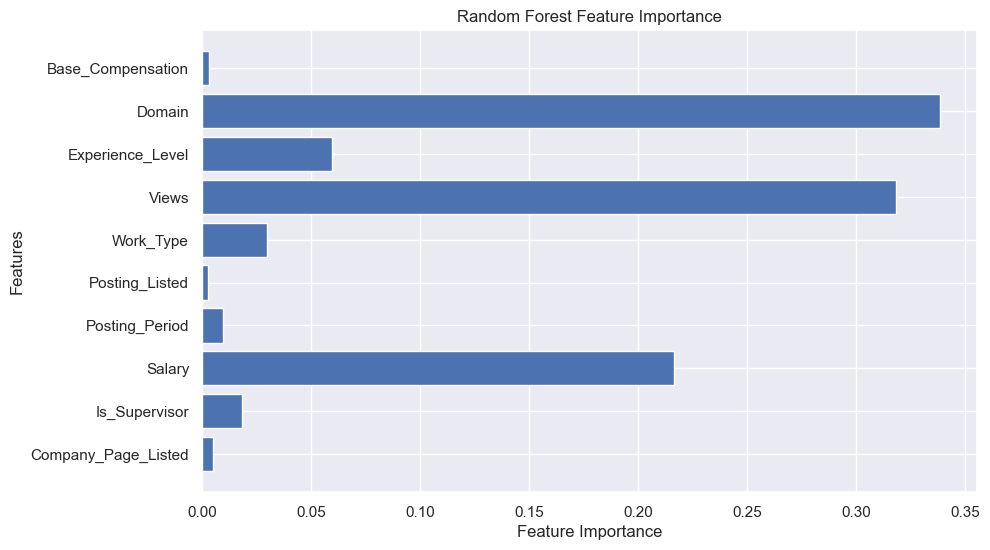

In [31]:

# Assuming 'X_train' contains your training features and 'y_train' contains your target labels
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Plotting feature importances
plt.figure(figsize=(10,6))
plt.barh(X_train.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


In [32]:
from xgboost import XGBClassifier
# Create and train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42,max_features='sqrt', n_estimators=100, max_depth=10)
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("XGBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)

c:\Users\saven\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:53:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.736754716981132
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84      4949
           1       0.45      0.20      0.28      1676

    accuracy                           0.74      6625
   macro avg       0.61      0.56      0.56      6625
weighted avg       0.69      0.74      0.70      6625



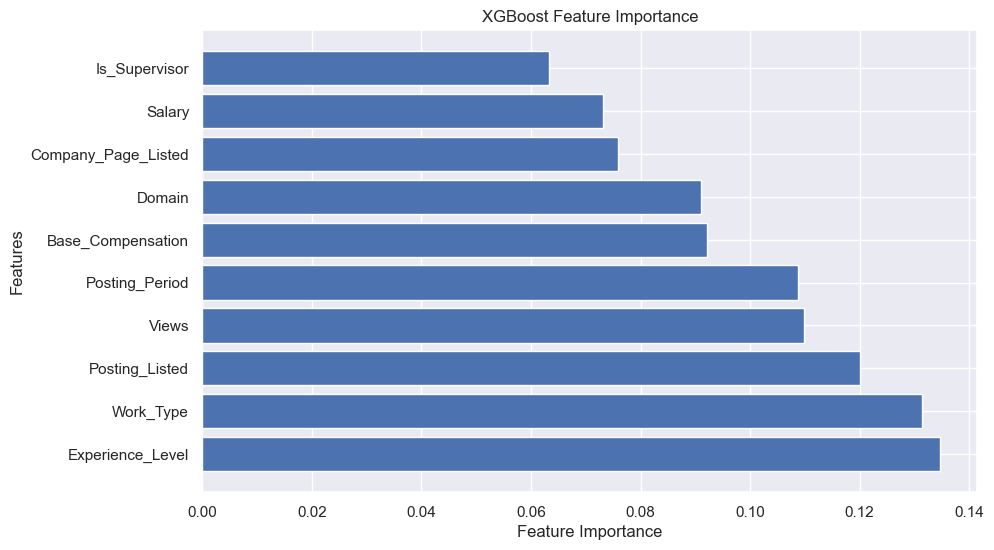

In [33]:
# Assuming 'X_train' contains your training features and 'y_train' contains your target labels
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = xgboost_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

In [34]:
## Hyper- parameter tunning  

#Grdisearch cv 

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Assume X and y are your feature matrix and target vector
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10], # Additional parameters can be tuned as needed
    'min_samples_leaf': [1, 2, 4]
}

# Setting up the model and grid search
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', refit=True)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# The best_estimator_ is already fitted with the best parameters on the full training set
best_model = grid_search.best_estimator_

# Now, best_model can be used to predict on test data
# X_test, y_test assumed to be your test data and labels
predictions = best_model.predict(X_test) 

# You can now calculate accuracy, F1 score, or any other metric for your test set
# For example, here is how to calculate F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions)

# Print the best parameters and the F1 score for the test set
print("Best hyperparameters:", best_params)
print("Test set F1 score:", f1)

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test set F1 score: 0.3078034682080925


In [36]:
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score

# Example setup - assume X and y are your feature matrix and target vector
# and that 'categorical_features' is the list of column indices for categorical data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree hyperparameter grid
dt_param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# CatBoost hyperparameter grid
cb_param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100]
}

# Initialize Decision Tree Grid Search
dt = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, scoring='f1', refit=True)
dt_grid_search.fit(X_train, y_train)

# Retrieve the best Decision Tree model
best_dt_model = dt_grid_search.best_estimator_
dt_predictions = best_dt_model.predict(X_test)
dt_f1 = f1_score(y_test, dt_predictions)

# Print the best parameters and the F1 score for the Decision Tree model
print("Decision Tree best hyperparameters:", dt_grid_search.best_params_)
print("Decision Tree test set F1 score:", dt_f1)


Decision Tree best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree test set F1 score: 0.31293881644934807


In [37]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score

# Example setup - assume X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost Grid Search
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid_search = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, cv=5, scoring='f1', refit=True)

# Perform hyperparameter tuning
xgb_grid_search.fit(X_train, y_train)

# Retrieve the best XGBoost model
best_xgb_model = xgb_grid_search.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test)
xgb_f1 = f1_score(y_test, xgb_predictions)

# Print the best parameters and the F1 score for the XGBoost model
print("XGBoost best hyperparameters:", xgb_grid_search.best_params_)
print("XGBoost test set F1 score:", xgb_f1)


c:\Users\saven\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\saven\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\saven\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\saven\anaconda3\Lib\site-packages\

XGBoost best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
XGBoost test set F1 score: 0.300728807057921


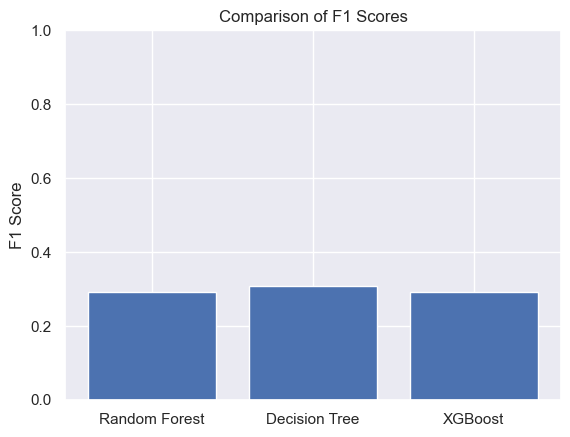

In [38]:
import matplotlib.pyplot as plt


f1_score_rf = 0.29235880398671094  
f1_score_dt = 0.30853616729516625
f1_score_xgb = 0.2929133858267716 

# Put the scores in a dictionary for easier plotting
f1_scores = {
    'Random Forest': f1_score_rf,
    'Decision Tree': f1_score_dt,
    'XGBoost': f1_score_xgb
}

# Create a bar plot
plt.bar(f1_scores.keys(), f1_scores.values())

# Add labels and title
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores')
plt.ylim([0, 1])  # Assuming F1 score range from 0 to 1

# Display the plot
plt.show()

In [39]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Logistic Regression Accuracy: 0.75
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      4949
           1       0.50      0.03      0.05      1676

    accuracy                           0.75      6625
   macro avg       0.63      0.51      0.45      6625
weighted avg       0.69      0.75      0.65      6625

Confusion Matrix:
[[4902   47]
 [1629   47]]


c:\Users\saven\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from lightgbm import LGBMClassifier

# Create the LightGBM Classifier
lgb_classifier = LGBMClassifier(random_state=42)

lgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = lgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("LightGBM Model Accuracy:", accuracy)
print("Classification Report:\n", report)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

[LightGBM] [Info] Number of positive: 6424, number of negative: 20073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 26497, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242443 -> initscore=-1.139335
[LightGBM] [Info] Start training from score -1.139335
LightGBM Model Accuracy: 0.7536603773584906
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.98      0.86      4949
           1       0.59      0.09      0.16      1676

    accuracy                           0.75      6625
   macro avg       0.67      0.53      0.51      6625
weighted avg       0.72      0.75      0.68      6625

Confusion Matrix:
[[4843  106]
 [1526  150]]


In [41]:
# Create a pipeline with the KNN classifier
knn_pipeline = make_pipeline(KNeighborsClassifier())

# Define the parameter grid for GridSearchCV
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],  
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Best Parameters: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'uniform'}
Model Accuracy: 0.7252830188679246
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83      4949
           1       0.41      0.19      0.26      1676

    accuracy                           0.73      6625
   macro avg       0.59      0.55      0.55      6625
weighted avg       0.68      0.73      0.69      6625

Confusion Matrix:
[[4482  467]
 [1353  323]]


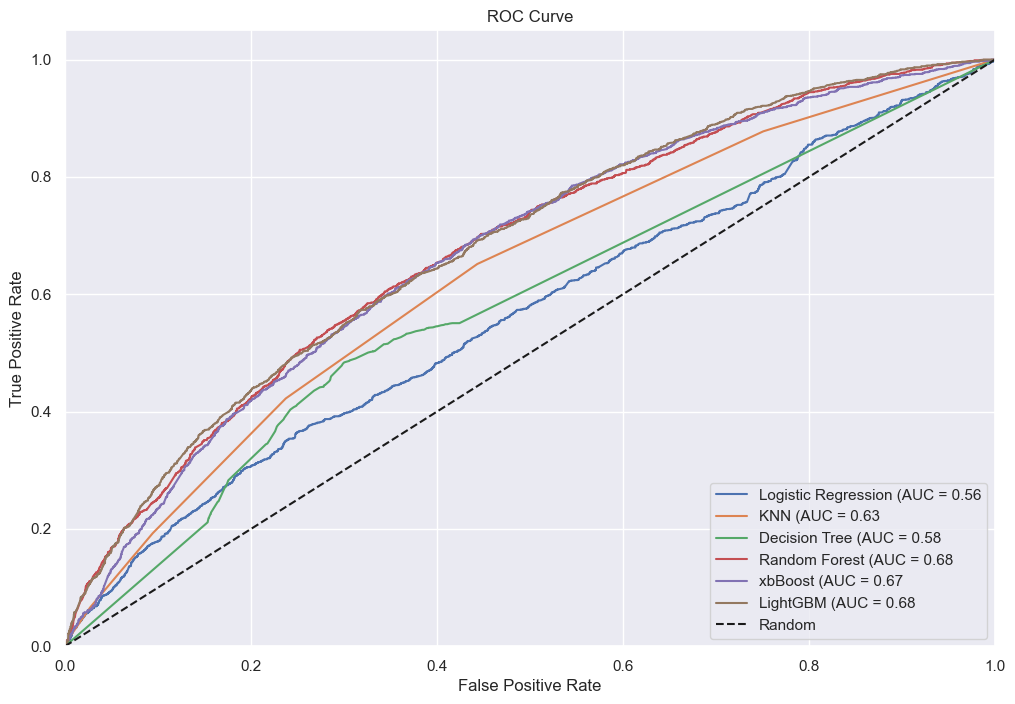

In [42]:
# Define a list of classifiers and their names excluding Linear Regression
classifiers = [logistic_model, best_estimator, dt_classifier, rf_classifier, xgb_classifier, lgb_classifier]
classifier_names = ["Logistic Regression", "KNN","Decision Tree", "Random Forest", "xbBoost", "LightGBM"]

# Create a function to plot ROC curve and calculate AUC
def plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test):
    plt.figure(figsize=(12, 8))
    for classifier, name in zip(classifiers, classifier_names):
        if hasattr(classifier, 'predict_proba'):  # Check if the classifier has predict_proba method
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        else:
            try:
                y_pred_prob = classifier.decision_function(X_test)
            except AttributeError:
                raise AttributeError(f"{name} does not have predict_proba or decision_function method.")

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f}")

    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves and calculate AUC for classifiers excluding Linear Regression
plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test)